# 単回帰分析において，最小二乗法，回帰係数，標準誤差，決定係数を理解し，モデルを構築する(2022/02/01)
---
## 概要
---
単回帰分析(regression analysis)について調べ，実際にモデルを構築する．その際，最小二乗法・回帰係数・標準誤差・決定係数についても理解する．

## 単回帰分析
---
「気温が観測できたとき，その日のアイスの売り上げが知りたい」「賃貸マンションの床面積が分かるとき，その家賃を知りたい」といったように，ある値から関連のある別の値を予測したいという期待は数多く存在する．そういった場合に利用できる分析アプローチの一つが単回帰分析である．

単回帰分析では，$D=\{(x_1,y_1),...,(x_n,y_n)\}$といった2変量のデータセットが標本としてある場合に，その関係性を尤もらしく説明できる直線にフィッティングする．すなわち,

\begin{eqnarray}
y = \beta + \alpha x
\end{eqnarray}

という直線(回帰モデル)を考え，データ点の分布に最も近くなるような係数$\alpha, \beta$を求めることが単回帰分析の要旨である．この係数をとりわけ回帰係数と呼ぶ．

またこのとき，変数$x$を説明変数，$y$を目的変数と呼ぶ．その名の通り，回帰モデルを構築した後，説明変数の値を用いて目的変数の値を予測していくことになる．

なお，単回帰分析においては説明変数が一つだけであるが，もちろん説明変数が複数存在する回帰モデルも存在する．この場合，単回帰分析ではなく重回帰分析と呼び名が変わる．

## 最小二乗法
---
単回帰モデルを構築するためには，係数$\alpha, \beta$を推定することが必要であると述べた．得られたデータ$D$をより良く近似するためには，元となるデータと予測との誤差が最小になればよい．つまり，以下のような誤差の二乗和が最小になるように$\alpha，\beta$を決める．これを最小二乗法という．

\begin{eqnarray}
L = \sum_{i=1}^{n}[y_i-(\beta + \alpha x_i)]^2
\end{eqnarray}

ここで$L$は損失(Loss)を表す関数とみなせる．さらに，データ$D$に平均を0とするような中心化を施していた場合，直線の切片項$\beta=0$となるから，

\begin{eqnarray}
L = \sum_{i=1}^{n}(y_i-\alpha x_i)^2
\end{eqnarray}

この損失関数の値が最小となるよう最適化すればよいことになる．

$L$を最小化する係数$\alpha, \beta$を導出する方法はいくつかあるが，先に結果を以下に示す：

\begin{eqnarray}
\alpha &=& \frac{s_{xy}}{s_x} = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2} \\
\\
\beta &=& \bar{y} - \alpha\bar{x} = \bar{y} - \frac{s_{xy}}{s_x}\bar{x}
\end{eqnarray}

### $\alpha$の導出
説明を簡単にするため，先にデータセットを以下のように中心化する：

\begin{eqnarray}
X_i &=& x_i - \bar{x} \\
Y_i &=& y_i - \bar{y}
\end{eqnarray}

よって損失関数$L$は以下のようになる：

\begin{eqnarray}
L = \sum_{i=1}^{n}(Y_i - \alpha X_i)^2
\end{eqnarray}

この関数を$\alpha$に関する二次関数とみなしたとき，最小値をとるのは(微分値)=0となるところであるから，(※凸関数であるかの吟味については省略する)

\begin{eqnarray}
\frac{\partial L}{\partial \alpha} &=& \frac{\partial}{\partial \alpha}\sum_{i=1}^{n}(Y_i - \alpha X_i)^2 \\
&=& \sum_{i=1}^{n}-2X_i(Y_i - \alpha X_i) \\
&=& -2\sum_{i=1}^{n}X_iY_i + 2\alpha\sum_{i=1}^{n}X_i^2
\end{eqnarray}

よって，
\begin{eqnarray}
-2\sum_{i=1}^{n}X_iY_i + 2\alpha\sum_{i=1}^{n}X_i^2 = 0
\end{eqnarray}

ゆえ，

\begin{eqnarray}
\alpha &=& \frac{\sum_{i=1}^{n}X_iY_i}{\sum_{i=1}^{n}X_i^2} \\\\
&=& \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2} \\\\
&=& \frac{s_{xy}}{{s_x}^2}
\end{eqnarray}

### $\beta$の導出
先の証明で以下のような直線の式が導出できた：

\begin{eqnarray}
Y &=& \alpha X \\
\end{eqnarray}

変数変換を元に戻すと，

\begin{eqnarray}
y-\bar{y} &=& \alpha(x-\bar{x}) \\
\end{eqnarray}

より，

\begin{eqnarray}
y &=& \alpha x -\alpha\bar{x} + \bar{y}\\
\end{eqnarray}

となる．つまり，

\begin{eqnarray}
y &=& \alpha x -\alpha\bar{x} + \bar{y}\\
\end{eqnarray}

となるから，係数を比較して，

\begin{eqnarray}
\beta &=& -\alpha\bar{x} + \bar{y}\\\\
&=& \bar{y}-\alpha\bar{x} \\\\
&=& \bar{y}-\frac{s_{xy}}{{s_x}^2}\bar{x}
\end{eqnarray}

となる．よってパラメータ$\beta$も導出できた．

## 単回帰モデルの評価
---
本説では，単回帰モデルの評価手法について，決定係数，標準誤差，p値について説明する．

### 決定係数
決定係数は，単回帰分析において用いる二変量の相関係数の二乗で表される値である．つまり，データ$D=\{(x_1,y_1),...,(x_n,y_n)\}$があるとして，

\begin{eqnarray}
R^2 &=& \left(\frac{s_{xy}}{s_xs_y}\right)^2 \\
&=& \left(\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}\right)^2
\end{eqnarray}

と表される．相関係数が-1から1までの値をとるので，その二乗である決定係数は0から1までの値をとる．決定係数を寄与率と呼ぶこともある．

また，上記の定義は厳密に言うと「最小二乗法を用いて単回帰モデルを最適化した場合」という条件が付いている．これは，最小二乗法が決定係数を最大化するように最適化することによる．

決定係数は現状様々な定義が存在しているが，その中でも一般的に知られているものを以下に記す：

\begin{eqnarray}
R^2 &=& 1 - \frac{(残差変動)}{(全変動)} \\
&=& 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y}_i)^2} 
\end{eqnarray}

あるいは，

\begin{eqnarray}
R^2 &=& \frac{(回帰変動)}{(全変動)} \\
&=& \frac{\sum_{i=1}^{n}(\hat{y}_i - \bar{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y}_i)^2}
\end{eqnarray}

これら2つの定義はいずれも意味しているものは同じで，「平均値からの偏差(全変動)のうち，回帰モデルによるもの(残差変動)『以外の割合』はどのくらいか」という意味である．抽象的に言い換えると，「説明変数から回帰モデルによって，どれだけ目的変数をよく説明できているか」という意味である．

とりうる値は1以下の実数であり，この値が大きいほど回帰モデルはデータ点によくフィットしていることになる．最小二乗法では，回帰モデルとデータ点との値の差(残差変動)を最小化するようにパラメータを最適化していることになる．

また補足として，決定係数がゼロになるときは(残差変動)=(全変動)となる時であるが，この時のモデルは最も単純なフィッティングだと捉えることができる．具体的には，傾きゼロ，切片が目的変数の平均値$\bar{y}$となるような定数の直線でフィッティングした場合がこれにあたる．

### 自由度調整済み決定係数
単回帰モデルの場合にはそもそも説明変数が一つなので問題になることはないが，重回帰モデルのように説明変数が複数存在する場合，決定係数は増加する傾向にあることが知られている．つまり重回帰分析においては決定係数があまり意味をなさない．

これに対処するため，自由度(≒説明変数の数)を考慮した決定係数の定義も存在し，以下のように

\begin{eqnarray}
R^2 = 1 - \frac{\frac{1}{N-p-1}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\frac{1}{N-1}\sum_{i=1}^{n}(y_i - \bar{y}_i)^2} 
\end{eqnarray}

と表される．$N$は標本の大きさであり，$p$は定数項を除いたパラメータの数である．

### 標準誤差
標準誤差(Standard Error)とは統計量の標準偏差のことで，一般的には標本平均の標準偏差として解釈される．母集団からn個の標本を抽出するとき，標準誤差は以下のように与えられる：

\begin{eqnarray}
(SE) = \frac{\sigma}{\sqrt{n}}
\end{eqnarray}

$\sigma$は母分散であり，これが不明な場合には不偏分散$s$を用いることも多い．標本の数を増やすことで，母平均の区間推定の精度が上げられる．中心極限定理により，十分に大きい標本数を用意すれば，標本平均は母平均に(ほぼ)等しくなる．

さて，ここまでが一般的な標準誤差の解釈であるが，回帰分析における標準誤差の活用はどのようなものだろうか．回帰分析においては「回帰モデルの推定値の標準誤差」「回帰係数の推定値の標準誤差」という2つの解釈が存在する．

### 回帰モデルの推定値の標準誤差(理解曖昧)
データ点が完全に直線状に並んでいない限りは，回帰モデルとデータ点との間に誤差が生じている．先に決定係数の説明で述べた残差変動のことである．こうした回帰モデルでは説明しきれない誤差がどれだけあるかを定量的に把握するため，残差変動の分散を求めることがある．これを残差分散と呼ぶ．つまり，

\begin{eqnarray}
V[(残差変動)] = \frac{1}{n-2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\end{eqnarray}

となる．除数が$n$ではなく$n-2$となっているのは，標本から推定される分散が過小評価されるためである．(単回帰モデルの自由度2を差し引いている)

この分散の平方根をとれば，回帰モデルの推定値の標準誤差が導出される．

### 回帰係数の推定値の標準誤差(理解曖昧)
回帰モデルを作る際に，母集団全てのデータを用いることは困難な場合が多い．すなわち標本から先に述べた最小二乗法でパラメータを推定することになる．この場合，どうしても母集団から求められる回帰モデルから傾きの誤差が生じてしまう．

母集団のデータすべてを用いた回帰直線の傾きからどれだけバラついているか，傾きの分散として，

\begin{eqnarray}
V[\alpha] &=& \frac{(残差変動の分散)}{(xの偏差平方和)} \\
&=& \frac{\frac{1}{n-2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
\end{eqnarray}

が与えられる．これの平方根を取ることで，回帰係数の推定値の標準誤差を求めることができる．標準誤差の大小によって，構築した回帰モデルの良し悪しを検討できる．

### p値(『コア・テキスト統計学』読了後にまとめる)

## Pythonを用いたシミュレーション
---
本節ではボストンの住宅価格データセットとsckit-learnを用いて，単回帰分析のシミュレーションを行う．

In [1]:
# ボストンの住宅価格データセットの読み込み
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


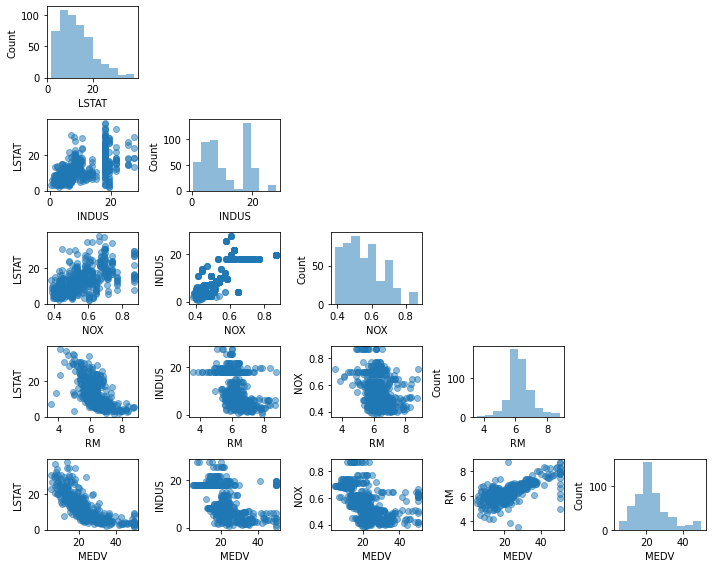

In [2]:
# 散布図行列を作成し，線形回帰ができそうな特徴量の組み合わせを探す
# mixtendを利用
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# 今回は，低所得者の割合・非小売業の土地面積の割合・窒素酸化物濃度・平均部屋数・住宅価格を利用
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10,8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

一戸あたりの平均部屋数(RM)と住宅価格の中央値(MEDV)に概ね線形関係が認められるので，MEDVを目的変数，RMを説明変数として単回帰モデルを構築する．

In [3]:
# sckit-learnを用いて単回帰モデルを構築
# 学習に確率的勾配降下法を用いていないらしく，標準化の必要がない
from sklearn.linear_model import LinearRegression

# 説明変数(RM)
X = df[['RM']].values
# 目的変数(MEDV)
y = df[['MEDV']].values

reg = LinearRegression().fit(X, y)

# 決定係数R^2
reg.score(X, y)

0.48352545599133423

In [4]:
# 回帰係数
# 傾きα
print(reg.coef_[0][0])

# 切片項β
print(reg.intercept_[0])

9.102108981180308
-34.670620776438554


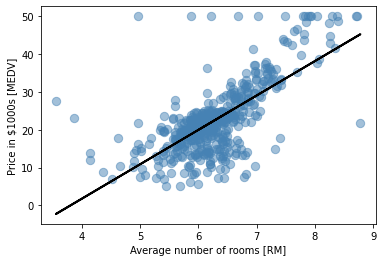

In [5]:
# データ点と回帰直線をプロット
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', s=70, alpha=0.5)
    plt.plot(X, model.predict(X), c='black', lw=2)
    return None

lin_regplot(X, y, reg)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

## 参考文献
---
S.Raschka, Vahid Mirjalili, [第3版]Python機械学習プログラミング，2020.

[単回帰分析とは，Albert](https://www.albert2005.co.jp/knowledge/statistics_analysis/multivariate_analysis/single_regression)

[27-1.単回帰分析，統計WEB](https://bellcurve.jp/statistics/course/9700.html)

[単回帰分析，日経リサーチ](https://www.nikkei-r.co.jp/glossary/id=1644)

[高校数学でわかる単回帰分析，おいしい数学](https://hiraocafe.com/note/simple-linear-regression.html)

[単回帰分析と重回帰分析，Chainerチュートリアル](https://tutorials.chainer.org/ja/07_Regression_Analysis.html#)

[27-4.決定係数と重相関係数，統計WEB](https://bellcurve.jp/statistics/course/9706.html)

[決定係数，Wikipedia](https://ja.wikipedia.org/wiki/%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B0)

[［評価関数］決定係数（Coefficient of Determination）R2とは？，itmedia](https://atmarkit.itmedia.co.jp/ait/articles/2108/25/news033.html)

[決定係数（寄与率）とは？高い場合と低い場合の解釈と相関との関係をわかりやすく，いちばんやさしい、医療統計](https://best-biostatistics.com/correlation_regression/r-square.html)

[決定係数の定義と相関係数との関係，高校数学の美しい物語](https://manabitimes.jp/math/1016)

[18-5.標準偏差と標準誤差，統計WEB](https://bellcurve.jp/statistics/course/8616.html)

[標準誤差，Wikipedia](https://ja.wikipedia.org/wiki/%E6%A8%99%E6%BA%96%E8%AA%A4%E5%B7%AE)

[標準偏差と標準誤差の違いをわかりやすく！計算式やエラーバーでの使い分けは？，いちばんやさしい、医療統計](https://best-biostatistics.com/summary/sd-se-chigai.html)

[標準誤差，日経リサーチ](https://www.nikkei-r.co.jp/glossary/id=1655)

[Q2 同じ実験を繰り返して得られた平均値の誤差を出すときに，標準偏差と標準誤差ではどちらを用いるのでしょうか？，実験医学online](https://www.yodosha.co.jp/jikkenigaku/statistics/q2.html)

[標準偏差と標準誤差：どちらを使うべきか？](http://www.acs.dis.titech.ac.jp/suzuki/sdandse.pdf)

[標準誤差とは何なのか。95％信頼区間から分かる推定精度のおはなし【視聴率を調べる手法】，アタリマエ！](https://atarimae.biz/archives/9881)

[統計学の基礎　回帰式の統計モデル](http://lbm.ab.a.u-tokyo.ac.jp/~omori/kokusai/kokusai08_1218.html)

[「標本平均の標準誤差」と「回帰分析の推定値の標準誤差」と「回帰係数の推定値の標準誤差」,こんてんつこうかい](https://contents-open.hatenablog.com/entry/2021/07/11/163530)

[回帰係数の期待値と分散、標準誤差の計算，Pythonic HighSchool](https://ictsr4.com/py/r0160.html)

[回帰分析，ようこそ、化学標準物質の不確かさへのいざない](https://staff.aist.go.jp/t.ihara/reg.html)

[Scatter Plot Matrix，mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/scatterplotmatrix/)

[sklearn.linear_model.LinearRegression，scikit-learn 1.0.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[matplotlib.pyplot.scatter，Matplotlib 3.5.1 documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

[matplotlib.pyplot.plot，Matplotlib 3.5.1 documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)